In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [104]:
log_folder='logs'

algoritimos = {
    1: "Concurrent",
    2: "FCFS-E",
    3: "DP-E",    
    4: "FCFS-I",
    5: "DP-I",
    7: "CB-E",
    8: "Nova"
}

#expertiments_anlysis=[1,2,3,4,5,7,8,9,10,11,12]
expertiments_anlysis=[1,2,3,5,7]
#expertiments_anlysis=[1,2,3,4]
cores={
    1:'blue',2:'orange',3:'green',4:'red',5:'purple',7:'brown'}
topology="A"
mobile_users = [0,1,2,3,4,5,6,7,8,9,10,11,12]

In [14]:
estilos = {}
for key in cores:
    estilos[algoritimos[key]] = cores[key]

estilos

{'Concurrent': 'blue',
 'FCFS-E': 'orange',
 'DP-E': 'green',
 'FCFS-I': 'red',
 'DP-I': 'purple',
 'CB-E': 'brown'}

In [111]:
df_network = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_network.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_network.empty:
            df_network = df
        else:
            df_network = pd.concat([df_network,df])        
            
df_network['CurrentNetwork'] = df_network['CurrentNetwork']/1024

<AxesSubplot:title={'center':'Total network use'}, xlabel='Número Usuários'>

<Figure size 360x720 with 0 Axes>

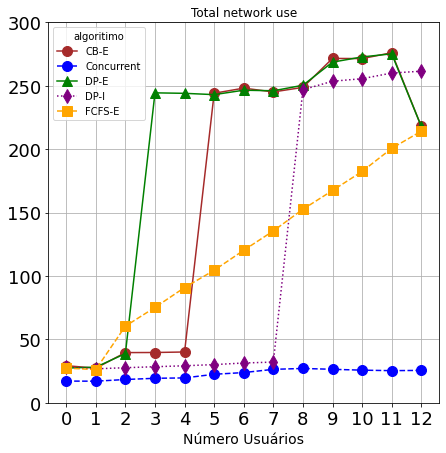

In [112]:
#total_network = df_network.groupby(['n_user','algoritimo']).max()

fig = plt.figure(figsize=(5,10))

#for algo in expertiments_anlysis:
#    ax = df_network[df_network['algoritimo']==algoritimos[algo]].groupby('n_user') \
#        .max()['CurrentNetwork'].plot()    
    
#fig.lenged()    


ax = df_network \
    .pivot_table(values='CurrentNetwork',
                       index=['n_user'],
                       columns=['algoritimo'],
                       aggfunc='last'
                      )\
    .plot(title='Total network use',
          fontsize=18,         
          markersize=10,
          figsize=(7,7),
          color=estilos,
          style=["o-","o--","^-","d:",'s--'],
         )
ax.set_xlabel("Número Usuários", fontsize=14)
ax.set_xticks(mobile_users)
ax.set_yticks(range(0,350,50))
ax.grid()
ax

In [17]:
df_network[(df_network['algoritimo']=='CB-E') & (df_network['n_user']==0) & (df_network['Time']==9999)][-1:]

,Time,CurrentNetwork,algoritimo,n_user
209978,9999.0,29.273982,CB-E,0


In [18]:
# df_processos_dispositivo = pd.DataFrame()

# for experiment_number in expertiments_anlysis:
#     for mobile_user in mobile_users:
#         df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_processoXDispostivo.csv')
#         df['algoritimo'] = algoritimos[experiment_number]
#         df['n_user'] = mobile_user
#         if df_processos_dispositivo.empty:
#             df_processos_dispositivo = df
#         else:
#             df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
        
        

# df_processos_dispositivo

In [19]:
# df_processos_dispositivo[
#     (df_processos_dispositivo['Time']==9999) &
#     (df_processos_dispositivo['n_user']==12) &
#     (df_processos_dispositivo['algoritimo']=='Concurrent') 
#      ]

In [113]:
df_delay = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_loopsDelays.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_delay.empty:
            df_delay = df
        else:
            df_delay = pd.concat([df_delay,df])
        
        
df_delay["app"] =0
df_delay["app"] = np.where(df_delay["Application"].str.startswith("VRGame"),"VR_GAME",df_delay["app"])
df_delay["app"] = np.where(df_delay["Application"].str.startswith("DCNS"),"DCNS",df_delay["app"])

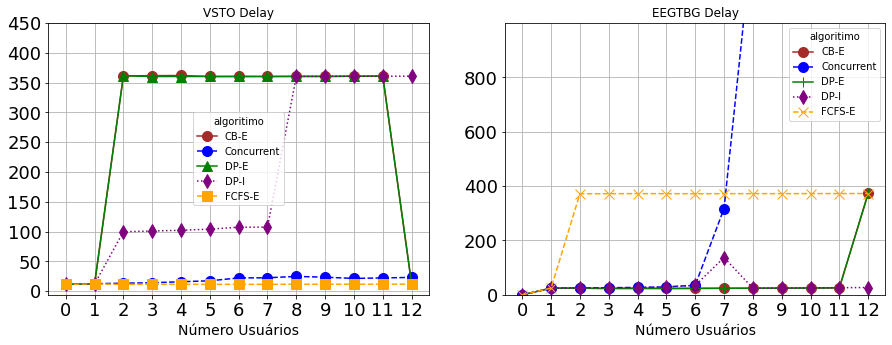

In [118]:

df_delay2 = df_delay[
    #(df_delay['n_user']==12) &
    #(df_delay['algoritimo']=='CB-E') &
    (df_delay['Time']==9999) &
    (
        (df_delay['Application']=='VRGame1')  |
        (df_delay['Application']=='DCNS')  
    )    
     ]

#total_network = df_network.groupby(['n_user','algoritimo']).max()

#fig = plt.figure(figsize=(5,10))
fig, axs = plt.subplots(1, 2, figsize=(15,5))

df_delay_pivot = df_delay2[df_delay2['Application']=='DCNS'].pivot_table(values=['Delay'],
                      index=['n_user'],
                      columns=['algoritimo'],
                      aggfunc=np.sum
                     )
df_delay_pivot.columns = df_delay_pivot.columns.get_level_values(1)
df_delay_pivot.plot(title='VSTO Delay',
                            ax=axs[0],
                            fontsize=18,
                            markersize=10,
                            color=estilos,
                            style=["o-","o--","^-","d:",'s--']
                     )
axs[0].set_xlabel("Número Usuários", fontsize=14)
axs[0].set_xticks(mobile_users)
axs[0].set_yticks(range(0,500,50))
axs[0].grid()


df_delay_pivot = df_delay2[df_delay2['Application']=='VRGame1'].pivot_table(values=['Delay'],
                      index=['n_user'],
                      columns=['algoritimo'],
                      aggfunc=np.sum
                     )

df_delay_pivot.columns = df_delay_pivot.columns.get_level_values(1)
df_delay_pivot.plot(title='EEGTBG Delay',
                            ax=axs[1],
                            fontsize=18,
                            markersize=10,
                            color=estilos,
                            style=["o-","o--","|-","d:",'x--'],
                            ylim=1000
                     )
axs[1].set_xlabel("Número Usuários", fontsize=14)
axs[1].set_xticks(mobile_users)
axs[1].set_yticks(range(0,1000,200))
axs[1].set_ylim(0, 1000)
axs[1].grid()

In [106]:
df_processos_dispositivo = pd.DataFrame()

for experiment_number in expertiments_anlysis:
    for mobile_user in mobile_users:
        df = pd.read_csv(f'{log_folder}/{topology}_{experiment_number}_{mobile_user}_processoXDispostivo.csv')
        df['algoritimo'] = algoritimos[experiment_number]
        df['n_user'] = mobile_user
        if df_processos_dispositivo.empty:
            df_processos_dispositivo = df
        else:
            df_processos_dispositivo = pd.concat([df_processos_dispositivo,df])
        
        
df_processos_dispositivo["label"] = df_processos_dispositivo["Application"] +"/"+df_processos_dispositivo["Dispostivo"]

df_processos_dispositivo

,Module,Count,Time,Level,Application,Dispostivo,algoritimo,n_user,label
0,user_interface,1,1.0,0,DCNS,cloud,Concurrent,0,DCNS/cloud
1,object_tracker,0,1.0,4,DCNS,cloudlet-0-1,Concurrent,0,DCNS/cloudlet-0-1
2,object_detector,0,1.0,4,DCNS,cloudlet-0-1,Concurrent,0,DCNS/cloudlet-0-1
3,object_tracker,4,1.0,4,DCNS,cloudlet-1-1,Concurrent,0,DCNS/cloudlet-1-1
4,object_detector,4,1.0,4,DCNS,cloudlet-1-1,Concurrent,0,DCNS/cloudlet-1-1
...,...,...,...,...,...,...,...,...,...
249860,client_1,1,9999.0,5,VRGame1,m-VRGame1-1-9,CB-E,12,VRGame1/m-VRGame1-1-9
249861,client_1,1,9999.0,5,VRGame1,m-VRGame1-1-10,CB-E,12,VRGame1/m-VRGame1-1-10
249862,client_1,1,9999.0,5,VRGame1,m-VRGame1-1-11,CB-E,12,VRGame1/m-VRGame1-1-11
249863,object_tracker,0,9999.0,4,DCNS,cloudlet-2-1,CB-E,12,DCNS/cloudlet-2-1


In [107]:
df_processos_dispositivo2 = df_processos_dispositivo[
    (df_processos_dispositivo['Time']==9999) &
       (
        (df_processos_dispositivo['Application']=='VRGame1')  |
        (df_processos_dispositivo['Application']=='DCNS')  
    ) &
    (
        (df_processos_dispositivo['Dispostivo']=='cloud')  |
        (df_processos_dispositivo['Dispostivo']=='cloudlet-1-1')  
    )
]
df_processos_dispositivo2  
     

,Module,Count,Time,Level,Application,Dispostivo,algoritimo,n_user,label
109978,user_interface,1,9999.0,0,DCNS,cloud,Concurrent,0,DCNS/cloud
109981,object_tracker,4,9999.0,4,DCNS,cloudlet-1-1,Concurrent,0,DCNS/cloudlet-1-1
109982,object_detector,4,9999.0,4,DCNS,cloudlet-1-1,Concurrent,0,DCNS/cloudlet-1-1
139972,user_interface,1,9999.0,0,DCNS,cloud,Concurrent,1,DCNS/cloud
139975,connector_1,1,9999.0,4,VRGame1,cloudlet-1-1,Concurrent,1,VRGame1/cloudlet-1-1
...,...,...,...,...,...,...,...,...,...
249840,connector_1,12,9999.0,0,VRGame1,cloud,CB-E,12,VRGame1/cloud
249841,concentration_calculator_1,12,9999.0,0,VRGame1,cloud,CB-E,12,VRGame1/cloud
249842,user_interface,4,9999.0,0,DCNS,cloud,CB-E,12,DCNS/cloud
249845,object_tracker,4,9999.0,4,DCNS,cloudlet-1-1,CB-E,12,DCNS/cloudlet-1-1


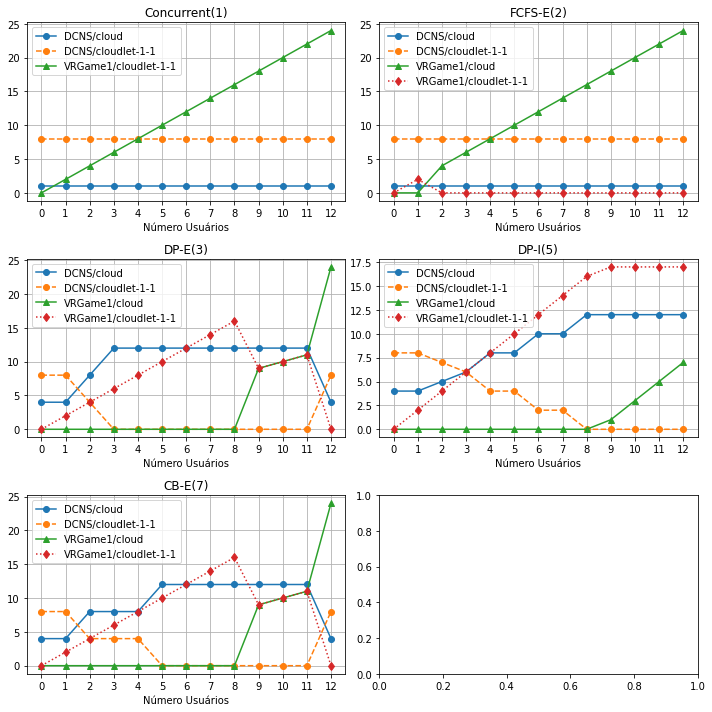

In [110]:
fig, axs = plt.subplots(len(expertiments_anlysis)//2+len(expertiments_anlysis)%2, 2, figsize=(10,10))


for key, algo in enumerate(expertiments_anlysis):
    df_processos_dispositivo3 = df_processos_dispositivo2[df_processos_dispositivo2['algoritimo']==algoritimos[algo]].pivot_table(
                                     values=['Count'],
                                     index=['n_user'],
                                     columns=['label'],                                     
                                     aggfunc=np.sum
                                     ).fillna(0)
    df_processos_dispositivo3.columns = [col[1] for col in df_processos_dispositivo3.columns.values]
    df_processos_dispositivo3.plot(ax=axs[key//2, key%2],
                                  style=["o-","o--","^-","d:",'s--'],
                                  title=f'{algoritimos[algo]}({algo})')
    axs[key//2, key%2].set_xlabel("Número Usuários", fontsize=10)
    axs[key//2, key%2].set_xticks(mobile_users)
    axs[key//2, key%2].grid()    
plt.tight_layout()    
 